# Capstone Data Wrangling

The goal of this capstone project is to predict loan repayment ability of clients, namely the probability of default of clients. The data set that we use for this project comes from publicly available Kaggle Competition dataset provided by Home Credit.

+ Data source: https://www.kaggle.com/c/home-credit-default-risk/dataAll 

We will follow the steps below:

+ First, we need to import the necessary libraries.
+ Second, we will load the datasets and check the features of these datasets.
+ Third, we will check if there is any missing data and check whether the size of missing data would effect our analysis.
+ Fourth, we will propose a way to deal with missing values.
+ Next, we will merge datasets into one dataset in order to do analysis more conveniently.


**1. Importing the necessary libraries**

First, we import numpy, pandas, seaborn, sklearn, matplotlib, which are necessary to do the analysis in data science project.

In [19]:
# importing numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
# importing matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
# File system manangement
import os

**2. Listing dataset files and loading them**

We will list all the available data files:

In [20]:
# Listing data files 
print(os.listdir("../Capstone/Dataset/"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


Hence, as we see from above there are total of 9 files: 1 main file for training, 1 main file for testing, 1 example submission file, and 6 other files containing additional information about each loan.

**Let us now load these 8 datasets with dataframe names as follows:**
+ application_train.csv into dataframe app_train
+ application_test.csv into dataframe app_test
+ bureau.csv into into dataframe bureau
+ bureau_balance.csv into dataframe bureau_balance
+ POS_CASH_balance.csv into dataframe POS_CASH_balance
+ credit_card_balance.csv into dataframe credit_card_balance
+ previous_application.csv into dataframe previous_application
+ installments_payments.csv into dataframe installments_payments

In [21]:
app_train = pd.read_csv('../Capstone/Dataset/application_train.csv')
app_test = pd.read_csv('../Capstone/Dataset/application_test.csv')
bureau = pd.read_csv('../Capstone/Dataset/bureau.csv')
bureau_balance = pd.read_csv('../Capstone/Dataset/bureau_balance.csv')
POS_CASH_balance = pd.read_csv('../Capstone/Dataset/POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('../Capstone/Dataset/credit_card_balance.csv')
previous_application = pd.read_csv('../Capstone/Dataset/previous_application.csv')
installments_payments = pd.read_csv('../Capstone/Dataset/installments_payments.csv')

**Next, we look at the basic information such as number of variables, variable names, number of observations, etc in the loadad datasets:**

+  **Starting with trainning dataset:**

In [22]:
# Feautes of training data

print('Training data shape:', app_train.shape)

Training data shape: (307511, 122)


In [23]:
# Exploring first rows of the data
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Getting all the columns of training data
app_train.columns.values.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

   **Hence, the training dataset has 307511 observations and 122 variables (names listed as above)**

In [25]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

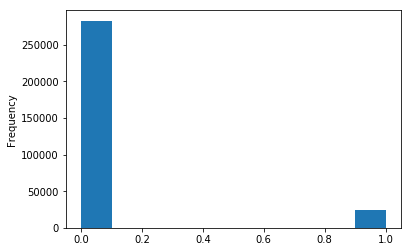

In [26]:
app_train['TARGET'].plot.hist()

   **Hence, majority of loan applicants pay (282686 applicants=0), only 24825 applicants are under risk (1).**
   
+ **Let us now look at the same features of testing dataset:**

In [27]:
# Testing data features
print('Testing data shape:', app_test.shape)
app_test.head()

Testing data shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Getting all the columns of testing data
app_test.columns.values.tolist()

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEAR

**Hence, the test dataset has 121 variables, missing the Target column and the other variables are the same. The number of observations in test dataset (48744 vs train: 307511) less compared to train dataset.**

+ **Let us also look at the other datafiles that has information about features of the applicants:**

In [29]:
print('Size of bureau data', bureau.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of installments_payments data', installments_payments.shape)

Size of bureau data (1716428, 17)
Size of bureau_balance data (27299925, 3)
Size of POS_CASH_balance data (10001358, 8)
Size of credit_card_balance data (3840312, 23)
Size of previous_application data (1670214, 37)
Size of installments_payments data (13605401, 8)


In [30]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [31]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [32]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [33]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [34]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


**3. Missing Data Analysis**

**Let us now check for missing values. We will look at the number and percentage of missing values in each column**

+ **Let us first start with identify and calculating missing values in training data:**

In [36]:
# Function to calculate missing values in training data 
total = app_train.isnull().sum().sort_values(ascending = False)
percent = (app_train.isnull().sum()/app_train.isnull().count()*100).sort_values(ascending = False)
missing_app_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_app_train.loc[missing_app_train['Total']!=0])

                               Total    Percent
COMMONAREA_MEDI               214865  69.872297
COMMONAREA_AVG                214865  69.872297
COMMONAREA_MODE               214865  69.872297
NONLIVINGAPARTMENTS_MODE      213514  69.432963
NONLIVINGAPARTMENTS_MEDI      213514  69.432963
NONLIVINGAPARTMENTS_AVG       213514  69.432963
FONDKAPREMONT_MODE            210295  68.386172
LIVINGAPARTMENTS_MEDI         210199  68.354953
LIVINGAPARTMENTS_MODE         210199  68.354953
LIVINGAPARTMENTS_AVG          210199  68.354953
FLOORSMIN_MEDI                208642  67.848630
FLOORSMIN_MODE                208642  67.848630
FLOORSMIN_AVG                 208642  67.848630
YEARS_BUILD_MEDI              204488  66.497784
YEARS_BUILD_AVG               204488  66.497784
YEARS_BUILD_MODE              204488  66.497784
OWN_CAR_AGE                   202929  65.990810
LANDAREA_MODE                 182590  59.376738
LANDAREA_AVG                  182590  59.376738
LANDAREA_MEDI                 182590  59

**Hence, 67 out of 122 variables have missing values, looking at the percentage of missing values 49 of these variables have above or close to 50% missing values.**

**Let us visualize:**

Text(0.5,1,'Percent Missing Data by Feature')

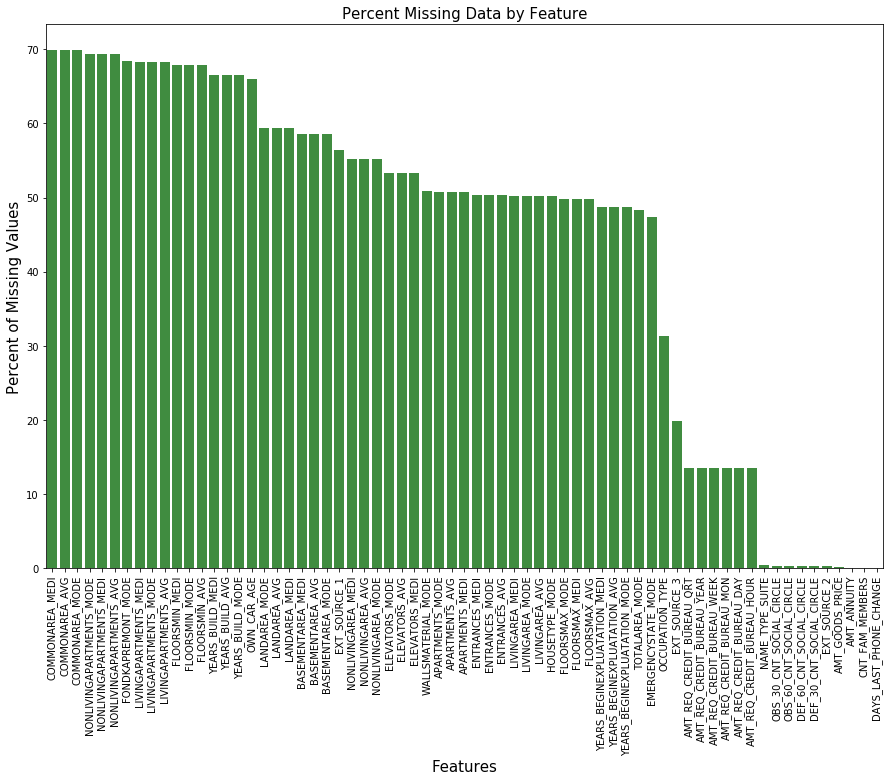

In [37]:
ms= missing_app_train[missing_app_train["Percent"] > 0]
x,y= plt.subplots(figsize=(15,10))
plt.xticks(rotation='90')
fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percent Missing Data by Feature', fontsize=15)

+ **Let us do similar missing value analysis in other datasets:**

In [38]:
# checking missing data in bureau
total = bureau.isnull().sum().sort_values(ascending = False)
percent = (bureau.isnull().sum()/bureau.isnull().count()*100).sort_values(ascending = False)
missing_bureau_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("Missing data in bureau:")
print(missing_bureau_data)

Missing data in bureau:
                          Total    Percent
AMT_ANNUITY             1226791  71.473490
AMT_CREDIT_MAX_OVERDUE  1124488  65.513264
DAYS_ENDDATE_FACT        633653  36.916958
AMT_CREDIT_SUM_LIMIT     591780  34.477415
AMT_CREDIT_SUM_DEBT      257669  15.011932
DAYS_CREDIT_ENDDATE      105553   6.149573
AMT_CREDIT_SUM               13   0.000757
CREDIT_TYPE                   0   0.000000
AMT_CREDIT_SUM_OVERDUE        0   0.000000
CNT_CREDIT_PROLONG            0   0.000000
DAYS_CREDIT_UPDATE            0   0.000000
CREDIT_DAY_OVERDUE            0   0.000000
DAYS_CREDIT                   0   0.000000
CREDIT_CURRENCY               0   0.000000
CREDIT_ACTIVE                 0   0.000000
SK_ID_BUREAU                  0   0.000000
SK_ID_CURR                    0   0.000000


Text(0.5,1,'Percent Missing Data by Feature')

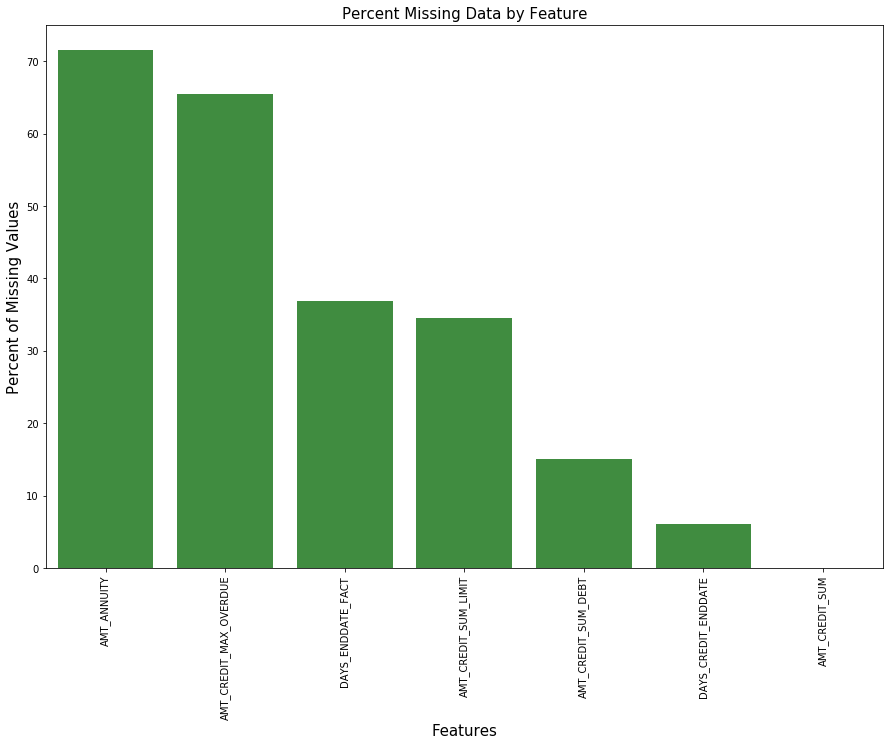

In [39]:
ms= missing_bureau_data [missing_bureau_data ["Percent"] > 0]
x,y= plt.subplots(figsize=(15,10))
plt.xticks(rotation='90')
fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percent Missing Data by Feature', fontsize=15)

Amount of annuity and credit maximum overdue variables have higher percentage (Above 50% of observations) of missing values.

In [40]:
# checking missing data in bureau_balance
total = bureau_balance.isnull().sum().sort_values(ascending = False)
percent = (bureau_balance.isnull().sum()/bureau_balance.isnull().count()*100).sort_values(ascending = False)
missing_bureau_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("Missing data in bureau_balance:")
print(missing_bureau_balance_data)

Missing data in bureau_balance:
                Total  Percent
STATUS              0      0.0
MONTHS_BALANCE      0      0.0
SK_ID_BUREAU        0      0.0


In [41]:
# checking missing data in POS_CASH_balance
total = POS_CASH_balance.isnull().sum().sort_values(ascending = False)
percent = (POS_CASH_balance.isnull().sum()/POS_CASH_balance.isnull().count()*100).sort_values(ascending = False)
missing_POS_CASH_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("Missing data in  POS_CASH_balance:")
missing_POS_CASH_balance_data.head()

Missing data in  POS_CASH_balance:


,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_DPD_DEF,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000


Text(0.5,1,'Percent Missing Data by Feature')

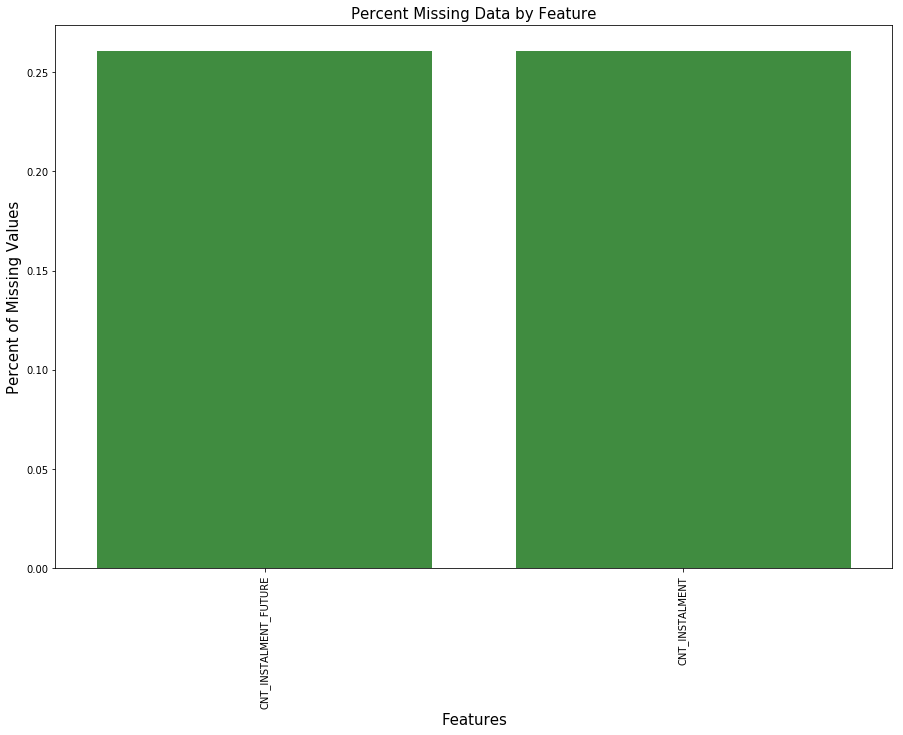

In [42]:
ms= missing_POS_CASH_balance_data[missing_POS_CASH_balance_data["Percent"] > 0]
x,y= plt.subplots(figsize=(15,10))
plt.xticks(rotation='90')
fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percent Missing Data by Feature', fontsize=15)

In [43]:
# checking missing data credit_card_balance
total = credit_card_balance.isnull().sum().sort_values(ascending = False)
percent = (credit_card_balance.isnull().sum()/credit_card_balance.isnull().count()*100).sort_values(ascending = False)
missing_credit_card_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("Missing data in credit_card_balance:")
print(missing_credit_card_balance_data)

Missing data in credit_card_balance:
                             Total    Percent
AMT_PAYMENT_CURRENT         767988  19.998063
AMT_DRAWINGS_OTHER_CURRENT  749816  19.524872
CNT_DRAWINGS_POS_CURRENT    749816  19.524872
CNT_DRAWINGS_OTHER_CURRENT  749816  19.524872
CNT_DRAWINGS_ATM_CURRENT    749816  19.524872
AMT_DRAWINGS_ATM_CURRENT    749816  19.524872
AMT_DRAWINGS_POS_CURRENT    749816  19.524872
CNT_INSTALMENT_MATURE_CUM   305236   7.948208
AMT_INST_MIN_REGULARITY     305236   7.948208
SK_DPD_DEF                       0   0.000000
SK_ID_CURR                       0   0.000000
MONTHS_BALANCE                   0   0.000000
AMT_BALANCE                      0   0.000000
AMT_CREDIT_LIMIT_ACTUAL          0   0.000000
AMT_DRAWINGS_CURRENT             0   0.000000
AMT_PAYMENT_TOTAL_CURRENT        0   0.000000
SK_DPD                           0   0.000000
AMT_RECEIVABLE_PRINCIPAL         0   0.000000
AMT_RECIVABLE                    0   0.000000
AMT_TOTAL_RECEIVABLE             0   0.0000

Text(0.5,1,'Percent Missing Data by Feature')

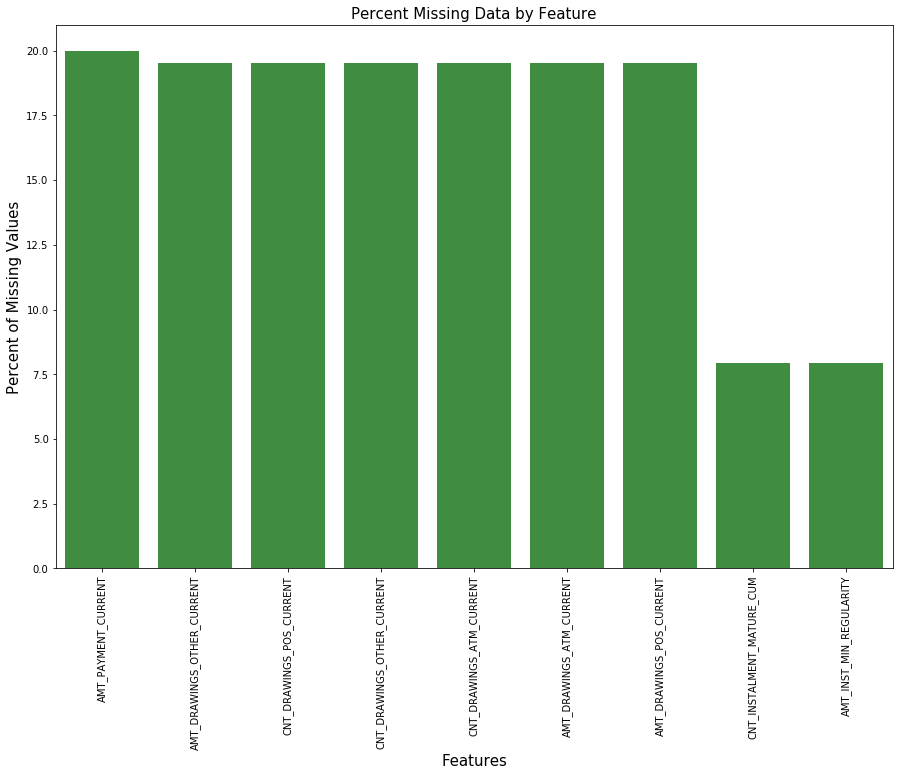

In [44]:
ms= missing_credit_card_balance_data[missing_credit_card_balance_data["Percent"] > 0]
x,y= plt.subplots(figsize=(15,10))
plt.xticks(rotation='90')
fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percent Missing Data by Feature', fontsize=15)

In [45]:
# checking missing data previous_application
total = previous_application.isnull().sum().sort_values(ascending = False)
percent = (previous_application.isnull().sum()/previous_application.isnull().count()*100).sort_values(ascending = False)
missing_previous_application_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("Missing data in previous_application:")
print(missing_previous_application_data)

Missing data in previous_application:
                               Total    Percent
RATE_INTEREST_PRIVILEGED     1664263  99.643698
RATE_INTEREST_PRIMARY        1664263  99.643698
RATE_DOWN_PAYMENT             895844  53.636480
AMT_DOWN_PAYMENT              895844  53.636480
NAME_TYPE_SUITE               820405  49.119754
DAYS_TERMINATION              673065  40.298129
NFLAG_INSURED_ON_APPROVAL     673065  40.298129
DAYS_FIRST_DRAWING            673065  40.298129
DAYS_FIRST_DUE                673065  40.298129
DAYS_LAST_DUE_1ST_VERSION     673065  40.298129
DAYS_LAST_DUE                 673065  40.298129
AMT_GOODS_PRICE               385515  23.081773
AMT_ANNUITY                   372235  22.286665
CNT_PAYMENT                   372230  22.286366
PRODUCT_COMBINATION              346   0.020716
AMT_CREDIT                         1   0.000060
SK_ID_CURR                         0   0.000000
NAME_CONTRACT_TYPE                 0   0.000000
WEEKDAY_APPR_PROCESS_START         0   0.000000
HO

Text(0.5,1,'Percent Missing Data by Feature')

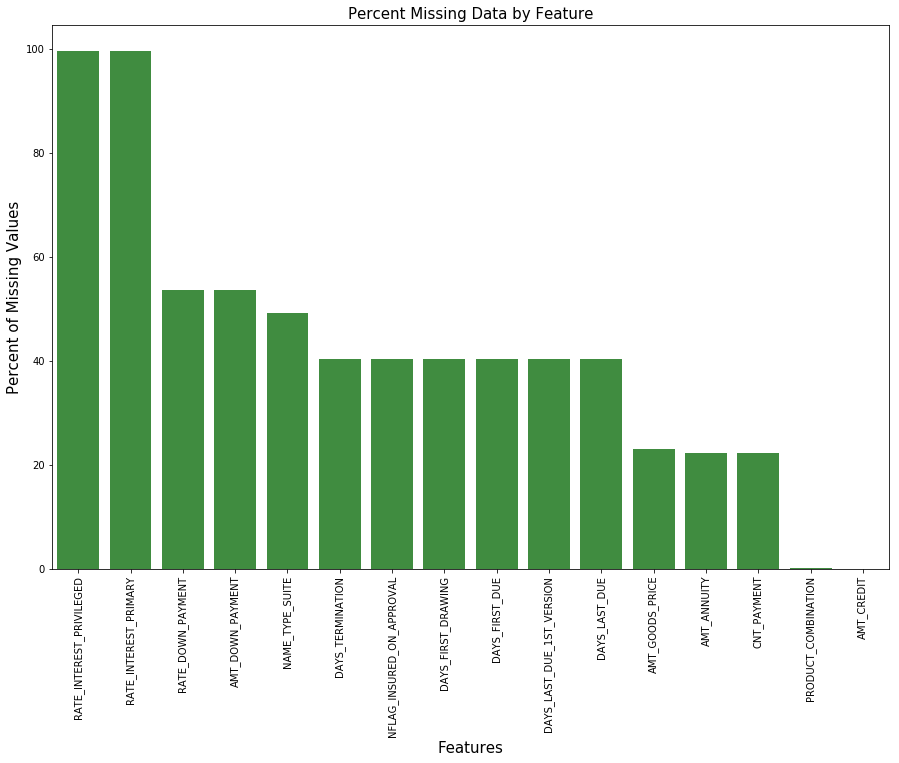

In [46]:
ms= missing_previous_application_data[missing_previous_application_data["Percent"] > 0]
x,y= plt.subplots(figsize=(15,10))
plt.xticks(rotation='90')
fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percent Missing Data by Feature', fontsize=15)

In [47]:
# checking missing data installments_payments
total = installments_payments.isnull().sum().sort_values(ascending = False)
percent = (installments_payments.isnull().sum()/installments_payments.isnull().count()*100).sort_values(ascending = False)
missing_installments_payments_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("Missing data in installments_payments:")
print(missing_installments_payments_data)

Missing data in installments_payments:
                        Total   Percent
AMT_PAYMENT              2905  0.021352
DAYS_ENTRY_PAYMENT       2905  0.021352
AMT_INSTALMENT              0  0.000000
DAYS_INSTALMENT             0  0.000000
NUM_INSTALMENT_NUMBER       0  0.000000
NUM_INSTALMENT_VERSION      0  0.000000
SK_ID_CURR                  0  0.000000
SK_ID_PREV                  0  0.000000


Text(0.5,1,'Percent Missing Data by Feature')

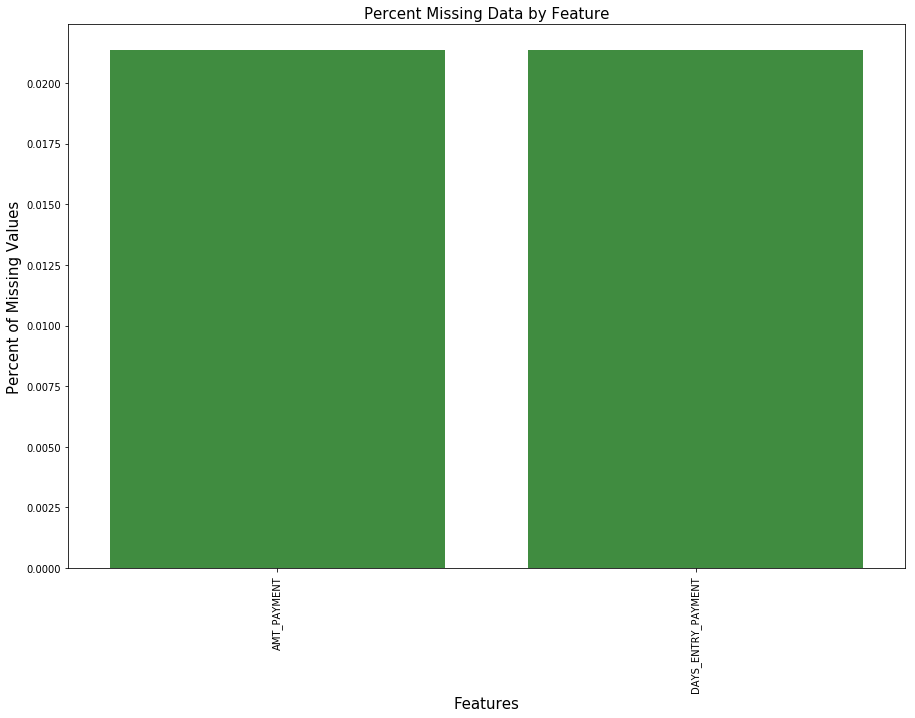

In [48]:
ms= missing_installments_payments_data[missing_installments_payments_data["Percent"] > 0]
x,y= plt.subplots(figsize=(15,10))
plt.xticks(rotation='90')
fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percent Missing Data by Feature', fontsize=15)

**4. Dealing with missing values:**

+ **Let us explore data before handling missing value problem for any outliers and anomalies. We will look at specific columns in training dataset:**

    1. Days_birth column
    2. Days_employed column



In [49]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

+ Ages looks reasonable, max and min ages do not show anomaly.

In [50]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

+ There is a problem in the maximum value, maximum value can not be 1000 years.

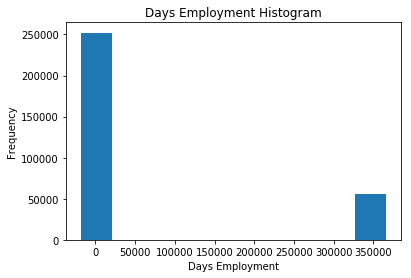

In [52]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

+ **Let us look at the data types and identify non-numerical variables. Then, we turn these non-numerical (categorical) variables into numberical variables.**

In [54]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [55]:
# Number of unique classes in each object type series
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

**In order to better use categorical variables in Machine Learning models. We will use "One Hot Encoding Technique".**

In [64]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()
le_count = 0
# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
   

# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


**Allining test and training datasets.**

In [71]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)



**In order to deal with missing values, we will use two methods:**

**1- Removing missing values: Replace missing values with NaN then Remove all Features with Missing Value then Assess Model using Logistic Regression**

**2- Replacing Nulls with NaN and Running Imputation Machine Learning.**


**1st Approach- Remove missing values**

In [66]:
#Omitting TARGET from Column list
train= app_train.drop(columns = ['TARGET'])
# Replace Nulls with NaN and mark zero values as missing or NaN
train.iloc[:, :] = train.iloc[:, :].replace('' , np.NaN)
# count the number of NaN values in each column
print(train.isnull().sum())

SK_ID_CURR                                       0
NAME_CONTRACT_TYPE                               0
FLAG_OWN_CAR                                     0
FLAG_OWN_REALTY                                  0
CNT_CHILDREN                                     0
AMT_INCOME_TOTAL                                 0
AMT_CREDIT                                       0
AMT_ANNUITY                                     12
AMT_GOODS_PRICE                                278
REGION_POPULATION_RELATIVE                       0
DAYS_BIRTH                                       0
DAYS_EMPLOYED                                    0
DAYS_REGISTRATION                                0
DAYS_ID_PUBLISH                                  0
OWN_CAR_AGE                                 202929
FLAG_MOBIL                                       0
FLAG_EMP_PHONE                                   0
FLAG_WORK_PHONE                                  0
FLAG_CONT_MOBILE                                 0
FLAG_PHONE                     

In [72]:
# dropping rows with missing values
train.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
train['TARGET']=app_train['TARGET']
print(train.shape)

(11351, 243)


In [73]:
# Deploying Logistic Regression
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X = train.iloc[:, :-1]
y = train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


**2nd Approach- Replacing missing values with NaN and then imputing with mean value**

In [77]:
# Replace Nulls with NaN, mark zero values as missing or NaN

app_train.iloc[:, :-1] = app_train.iloc[:, :-1].replace('', np.NaN)

# fill missing values with mean column values
app_train.fillna(app_train.mean(), inplace=True)


In [78]:
from sklearn.preprocessing import Imputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# split dataset into inputs and outputs
#values = dataset.values
X = app_train.iloc[:, :-1]
y = app_train.iloc[:, -1]
# fill missing values with mean column values
imputer = Imputer()
transformed_X = imputer.fit_transform(X)
# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, transformed_X, y, cv=kfold, scoring='accuracy')
print(result.mean())

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.9188614424641233


In [79]:
# Deploying Logistic Regression
#Splitting the dataset
#Keep the following 6 features (variables) which are important
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X = app_train.iloc[:, :-1]
y = app_train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


**Let us impute and save the data:**

In [80]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [90]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

log_reg_pred = log_reg.predict_proba(test)[:, -1]
data = app_test[['SK_ID_CURR']]
data['TARGET'] = log_reg_pred
data.head()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,SK_ID_CURR,TARGET
0,100001,0.066633
1,100005,0.127620
2,100013,0.083860
3,100028,0.060068
4,100038,0.128395


In [91]:
# Save to a csv file
newdata.to_csv('../Capstone/Dataset/log_reg_baseline.csv', index = False)

**5. Merging datasets:**

+ We need to combine different dataframes into one to easily analyze the data. SK_ID_CURR column is the common column for all data sets. 

+ First, Let us seperate dataframes from bureau based on CREDIT_ACTIVE column: There will be four types: active, closed, sold and bad debt namely: active_bureau_credit, closed_bureau_credit, sold_bureau_credit and bad_debt_bureau_credit, respectively . The number of each type for each idea will be calculated.
    
    
+ Next, we merge active_bureau_credit, closed_bureau_credit, sold_bureau_credit and bad_debt_bureau_credit by using joıint field SK_ID_CURR. We name new combined dataframe app_bureau_train.


+ We apply the same steps to the test data and  create a new dataframe app_bureau_test.


+ Next, we seperate dataframes from previous_application based on contract type (NAME_CONTRACT_TYPE olumn)

In [47]:
# Checking all the types of CREDIT_ACTIVE
bureau['CREDIT_ACTIVE'].unique()

# counting of all the types of CREDIT_ACTIVE
bureau['CREDIT_ACTIVE'].value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [49]:
# Geting summary of all the Active credit details
active_bureau_credit = bureau[bureau.CREDIT_ACTIVE=='Active'].groupby(['SK_ID_CURR'], as_index=False).sum()
active_bureau_credit.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100001,17689905,-928,0,3091.0,0.0,0.0,0,884025.000,596686.5,0.000,0.0,-32,24817.5
1,100002,12317812,-1145,0,780.0,0.0,40.5,0,481988.565,245781.0,31988.565,0.0,-31,0.0
2,100003,5885880,-606,0,1216.0,0.0,0.0,0,810000.000,0.0,810000.000,0.0,-43,0.0
3,100005,13470403,-199,0,1446.0,0.0,0.0,0,598626.000,568408.5,0.000,0.0,-42,4261.5
4,100008,6491434,-78,0,471.0,0.0,0.0,0,267606.000,240057.0,0.000,0.0,-16,0.0


In [50]:
np.max(active_bureau_credit['CNT_CREDIT_PROLONG'])


9

In [51]:
np.min(active_bureau_credit['DAYS_CREDIT_ENDDATE'])

-83445.0

In [52]:
np.min(active_bureau_credit['DAYS_ENDDATE_FACT'])

-8664.0

In [53]:
# Getting summary of all the Closed credit details
closed_bureau_credit = bureau[bureau.CREDIT_ACTIVE=='Closed'].groupby(['SK_ID_CURR'], as_index=False).sum()
closed_bureau_credit.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100001,23586526,-4217,0,-2514.0,-3302.0,0.000,0,569340.0,0.0,0.0,0.0,-620,0.0
1,100002,36908365,-5847,0,-2874.0,-4185.0,8364.645,0,383067.0,0.0,0.0,0.0,-3968,0.0
2,100003,17657634,-4997,0,-3394.0,-3292.0,0.000,0,207400.5,0.0,0.0,0.0,-3221,0.0
3,100004,13658267,-1734,0,-977.0,-1065.0,0.000,0,189037.8,0.0,0.0,0.0,-1064,0.0
4,100005,6735200,-373,0,-128.0,-123.0,0.000,0,58500.0,0.0,0.0,0.0,-121,0.0


In [54]:
np.max(closed_bureau_credit['CNT_CREDIT_PROLONG'])

6

In [55]:
# Getting summary of all the Sold credit details
sold_bureau_credit = bureau[bureau.CREDIT_ACTIVE=='Sold'].groupby(['SK_ID_CURR'], as_index=False).sum()
sold_bureau_credit.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100039,5153449,-1206,0,-980.0,0.0,0.0,0,945000.0,0.0,0.0,0.0,-109,0.00
1,100128,5941041,-2641,0,-1987.0,0.0,0.0,0,1003500.0,0.0,0.0,0.0,-1984,0.00
2,100162,6131361,-1998,0,-1272.0,0.0,0.0,0,82768.5,0.0,0.0,0.0,-1998,14882.85
3,100170,5915577,-147,0,0.0,0.0,0.0,0,13500.0,13770.0,0.0,0.0,-105,16200.00
4,100201,5928807,-2270,0,-1907.0,0.0,0.0,0,69898.5,0.0,0.0,0.0,-2154,0.00


In [56]:
np.max(sold_bureau_credit['CNT_CREDIT_PROLONG'])

1

In [57]:
# Geting summary of all the bad debt credit details
bad_debt_bureau_credit = bureau[bureau.CREDIT_ACTIVE=='Bad debt'].groupby(['SK_ID_CURR'], as_index=False).sum()
bad_debt_bureau_credit.head(10)

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,158069,6039562,-1683,366,-862.0,0.0,0.000,0,528165.00,0.000,0.000,503392.5,-1217,0.0
1,163442,5997537,-1502,366,-1292.0,0.0,0.000,0,57960.00,0.000,0.000,0.0,-1292,0.0
2,176952,5326184,-2241,1135,-1876.0,0.0,39991.500,0,450000.00,0.000,0.000,42.3,-737,0.0
3,186360,5499851,-1218,366,-852.0,0.0,0.000,0,121275.00,0.000,0.000,0.0,-1035,0.0
4,207535,5300044,-2834,0,-1724.0,-642.0,197937.225,0,135000.00,182632.635,-47632.635,0.0,-642,0.0
5,231185,5173404,-2740,1761,-2558.0,0.0,2137.500,0,14296.50,7717.500,0.000,7717.5,-888,0.0
6,232061,6441729,-2899,0,-1773.0,-1434.0,242637.480,0,365670.72,0.000,0.000,0.0,-1434,0.0
7,243877,6446445,-2493,366,-898.0,0.0,0.000,0,162000.00,0.000,0.000,17541.0,-1449,0.0
8,264970,5345303,-2728,0,-2514.0,-499.0,10530.000,0,57550.50,0.000,0.000,0.0,-499,12105.0
9,273612,5309530,-2112,0,-1900.0,-1550.0,40871.880,0,22510.89,0.000,0.000,0.0,-1550,0.0


In [58]:
np.max(bad_debt_bureau_credit['CNT_CREDIT_PROLONG'])

1

In [60]:
# Grouping count of Active, Bad_debt, Closed, Sold by SK_ID_CURR
bureau_credit_count = bureau.pivot_table(index=['SK_ID_CURR'], columns='CREDIT_ACTIVE', aggfunc='size', fill_value=0).reset_index()
bureau_credit_count = bureau_credit_count.rename(columns= {"Bad debt":"Bad_debt"})
bureau_credit_count.fillna(0, inplace=True)
bureau_credit_count.head()

CREDIT_ACTIVE,SK_ID_CURR,Active,Bad_debt,Closed,Sold
0,100001,3,0,4,0
1,100002,2,0,6,0
2,100003,1,0,3,0
3,100004,0,0,2,0
4,100005,2,0,1,0


In [65]:
# Merging app_train with all the bureau information and make new dataframe as app_bureau_train
app_bureau_train = pd.merge(app_train , active_bureau_credit, how='left', on='SK_ID_CURR')
app_bureau_train = pd.merge(app_bureau_train, closed_bureau_credit, how='left', on='SK_ID_CURR')
app_bureau_train = pd.merge(app_bureau_train, sold_bureau_credit, how='left', on='SK_ID_CURR')
app_bureau_train = pd.merge(app_bureau_train, bad_debt_bureau_credit, how='left', on='SK_ID_CURR')
app_bureau_train = pd.merge(app_bureau_train, bureau_credit_count, how='left', on='SK_ID_CURR')
app_bureau_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,AMT_CREDIT_SUM_y,AMT_CREDIT_SUM_DEBT_y,AMT_CREDIT_SUM_LIMIT_y,AMT_CREDIT_SUM_OVERDUE_y,DAYS_CREDIT_UPDATE_y,AMT_ANNUITY,Active,Bad_debt,Closed,Sold
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,6.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,3.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0


In [66]:
# Merging app_test with all the bureau information and make new dataframe as app_bureau_test
app_bureau_test = pd.merge(app_test , active_bureau_credit, how='left', on='SK_ID_CURR')
app_bureau_test = pd.merge(app_bureau_test, closed_bureau_credit, how='left', on='SK_ID_CURR')
app_bureau_test = pd.merge(app_bureau_test, sold_bureau_credit, how='left', on='SK_ID_CURR')
app_bureau_test = pd.merge(app_bureau_test, bad_debt_bureau_credit, how='left', on='SK_ID_CURR')
app_bureau_test = pd.merge(app_bureau_test, bureau_credit_count, how='left', on='SK_ID_CURR')
app_bureau_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,...,AMT_CREDIT_SUM_y,AMT_CREDIT_SUM_DEBT_y,AMT_CREDIT_SUM_LIMIT_y,AMT_CREDIT_SUM_OVERDUE_y,DAYS_CREDIT_UPDATE_y,AMT_ANNUITY,Active,Bad_debt,Closed,Sold
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,4.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,1.0,0.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4.0,0.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# Merging datasets based on contract type in previous application dataset:
# Get count of all the loan Contract Types
previous_application['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [68]:
# Geting summary of all the cash loan information
previous_application_cash_loan = previous_application[previous_application.NAME_CONTRACT_TYPE=='Cash loans'].groupby(['SK_ID_CURR'], as_index=False).sum()
previous_application_cash_loan = previous_application_cash_loan[['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE'] ]
previous_application_cash_loan = previous_application_cash_loan.rename(columns={'AMT_ANNUITY': 'PREV_CASH_AMT_ANNUITY', 'AMT_APPLICATION': 'PREV_CASH_AMT_APPLICATION', 'AMT_CREDIT': 'PREV_CASH_AMT_CREDIT','AMT_DOWN_PAYMENT':'PREV_CASH_AMT_DOWN_PAYMENT','AMT_GOODS_PRICE':'PREV_CASH_AMT_GOODS_PRICE' })
previous_application_cash_loan.fillna(0)
previous_application_cash_loan.head()

,SK_ID_CURR,PREV_CASH_AMT_ANNUITY,PREV_CASH_AMT_APPLICATION,PREV_CASH_AMT_CREDIT,PREV_CASH_AMT_DOWN_PAYMENT,PREV_CASH_AMT_GOODS_PRICE
0,100003,98356.995,900000.0,1035882.0,0.0,900000.0
1,100005,0.000,0.0,0.0,0.0,0.0
2,100006,96896.610,1818000.0,2063110.5,0.0,1818000.0
3,100007,68237.010,855000.0,954553.5,0.0,855000.0
4,100008,25309.575,450000.0,501975.0,0.0,450000.0


In [69]:
# Geting summary of all the consumer loan information
previous_application_consumer_loan = previous_application[previous_application.NAME_CONTRACT_TYPE=='Consumer loans'].groupby(['SK_ID_CURR'], as_index=False).sum()
previous_application_consumer_loan = previous_application_consumer_loan[['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE'] ]
previous_application_consumer_loan = previous_application_consumer_loan.rename(columns={'AMT_ANNUITY': 'PREV_CONSUMER_AMT_ANNUITY', 'AMT_APPLICATION': 'PREV_CONSUMER_AMT_APPLICATION', 'AMT_CREDIT': 'PREV_CONSUMER_AMT_CREDIT','AMT_DOWN_PAYMENT':'PREV_CONSUMER_AMT_DOWN_PAYMENT','AMT_GOODS_PRICE':'PREV_CONSUMER_AMT_GOODS_PRICE' })
previous_application_consumer_loan.fillna(0)
previous_application_consumer_loan.head()

,SK_ID_CURR,PREV_CONSUMER_AMT_ANNUITY,PREV_CONSUMER_AMT_APPLICATION,PREV_CONSUMER_AMT_CREDIT,PREV_CONSUMER_AMT_DOWN_PAYMENT,PREV_CONSUMER_AMT_GOODS_PRICE
0,100001,3951.000,24835.5,23787.0,2520.0,24835.5
1,100002,9251.775,179055.0,179055.0,0.0,179055.0
2,100003,71304.975,406309.5,416691.0,6885.0,406309.5
3,100004,5357.250,24282.0,20106.0,4860.0,24282.0
4,100005,4813.200,44617.5,40153.5,4464.0,44617.5


In [70]:
# Geting summary of all the revolving loan information
previous_application_revolving_loan = previous_application[previous_application.NAME_CONTRACT_TYPE=='Revolving loans'].groupby(['SK_ID_CURR'], as_index=False).sum()
previous_application_revolving_loan = previous_application_revolving_loan[['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE'] ]
previous_application_revolving_loan = previous_application_revolving_loan.rename(columns={'AMT_ANNUITY': 'PREV_REVOVING_AMT_ANNUITY', 'AMT_APPLICATION': 'PREV_REVOLVING_AMT_APPLICATION', 'AMT_CREDIT': 'PREV_REVOLVING_AMT_CREDIT','AMT_DOWN_PAYMENT':'PREV_REVOVING_AMT_DOWN_PAYMENT','AMT_GOODS_PRICE':'PREV_REVOVING_AMT_GOODS_PRICE' })
previous_application_revolving_loan.fillna(0)
previous_application_revolving_loan.head()

,SK_ID_CURR,PREV_REVOVING_AMT_ANNUITY,PREV_REVOLVING_AMT_APPLICATION,PREV_REVOLVING_AMT_CREDIT,PREV_REVOVING_AMT_DOWN_PAYMENT,PREV_REVOVING_AMT_GOODS_PRICE
0,100006,13500.0,270000.0,270000.0,0.0,270000.0
1,100011,9000.0,0.0,180000.0,0.0,0.0
2,100021,33750.0,0.0,675000.0,0.0,0.0
3,100023,2250.0,45000.0,45000.0,0.0,45000.0
4,100028,11250.0,0.0,225000.0,0.0,0.0


In [72]:
# Geting summary of all the XNA loan information
previous_application_XNA_loan = previous_application[previous_application.NAME_CONTRACT_TYPE=='XNA'].groupby(['SK_ID_CURR'], as_index=False).sum()
previous_application_XNA_loan = previous_application_XNA_loan[['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE'] ]
previous_application_XNA_loan = previous_application_XNA_loan.rename(columns={'AMT_ANNUITY': 'PREV_XNA_AMT_ANNUITY', 'AMT_APPLICATION': 'PREV_XNA_AMT_APPLICATION', 'AMT_CREDIT': 'PREV_XNA_AMT_CREDIT','AMT_DOWN_PAYMENT':'PREV_XNA_AMT_DOWN_PAYMENT','AMT_GOODS_PRICE':'PREV_XNA_AMT_GOODS_PRICE' })
previous_application_XNA_loan.fillna(0)
previous_application_XNA_loan.head()

,SK_ID_CURR,PREV_XNA_AMT_ANNUITY,PREV_XNA_AMT_APPLICATION,PREV_XNA_AMT_CREDIT,PREV_XNA_AMT_DOWN_PAYMENT,PREV_XNA_AMT_GOODS_PRICE
0,100523,0.0,0.0,0.0,0.0,0.0
1,101728,0.0,0.0,0.0,0.0,0.0
2,103244,0.0,0.0,0.0,0.0,0.0
3,103715,0.0,0.0,0.0,0.0,0.0
4,105000,0.0,0.0,0.0,0.0,0.0


In [73]:
# Group count of Active, Bad_debt, Closed, Sold by SK_ID_CURR
previous_application_loan_count = previous_application.pivot_table(index=['SK_ID_CURR'], columns='NAME_CONTRACT_TYPE', aggfunc='size', fill_value=0).reset_index()
previous_application_loan_count = previous_application_loan_count.rename(columns= {"Cash loans":"CASH_LOANS", "Consumer loans": "CONSUMER_LOANS", "Revolving loans":"REVOLVING_LOANS"})
previous_application_loan_count.fillna(0)
previous_application_loan_count.head()

NAME_CONTRACT_TYPE,SK_ID_CURR,CASH_LOANS,CONSUMER_LOANS,REVOLVING_LOANS,XNA
0,100001,0,1,0,0
1,100002,0,1,0,0
2,100003,1,2,0,0
3,100004,0,1,0,0
4,100005,1,1,0,0


In [76]:
# Merging all the previous application loan data with train and bureau data to create new dataframe app_bureau_loan_train
app_bureau_loan_train= pd.merge(app_bureau_train , previous_application_cash_loan, how='left', on='SK_ID_CURR')
app_bureau_loan_train = pd.merge(app_bureau_loan_train , previous_application_consumer_loan, how='left', on='SK_ID_CURR')
app_bureau_loan_train = pd.merge(app_bureau_loan_train , previous_application_revolving_loan, how='left', on='SK_ID_CURR')
app_bureau_loan_train= pd.merge(app_bureau_loan_train , previous_application_XNA_loan, how='left', on='SK_ID_CURR')
app_bureau_loan_train = pd.merge(app_bureau_loan_train , previous_application_loan_count, how='left', on='SK_ID_CURR')
app_bureau_loan_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,PREV_REVOVING_AMT_GOODS_PRICE,PREV_XNA_AMT_ANNUITY,PREV_XNA_AMT_APPLICATION,PREV_XNA_AMT_CREDIT,PREV_XNA_AMT_DOWN_PAYMENT,PREV_XNA_AMT_GOODS_PRICE,CASH_LOANS,CONSUMER_LOANS,REVOLVING_LOANS,XNA
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,270000.0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,2.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,0.0,0.0


In [79]:
# Merging all the previous application loan data with test and bureau data to create new dataframe app_bureau_loan_train
app_bureau_loan_test = pd.merge(app_bureau_test, previous_application_cash_loan, how='left', on='SK_ID_CURR')
app_bureau_loan_test = pd.merge(app_bureau_loan_test, previous_application_consumer_loan, how='left', on='SK_ID_CURR')
apapp_bureau_loan_test = pd.merge(app_bureau_loan_test, previous_application_XNA_loan, how='left', on='SK_ID_CURR')
app_bureau_loan_test = pd.merge(app_bureau_loan_test, previous_application_loan_count, how='left', on='SK_ID_CURR')
app_bureau_loan_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,...,PREV_CASH_AMT_GOODS_PRICE,PREV_CONSUMER_AMT_ANNUITY,PREV_CONSUMER_AMT_APPLICATION,PREV_CONSUMER_AMT_CREDIT,PREV_CONSUMER_AMT_DOWN_PAYMENT,PREV_CONSUMER_AMT_GOODS_PRICE,CASH_LOANS,CONSUMER_LOANS,REVOLVING_LOANS,XNA
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,NaN,3951.000,24835.5,23787.0,2520.0,24835.5,0.0,1.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,4813.200,44617.5,40153.5,4464.0,44617.5,1.0,1.0,0.0,0.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,450000.0,11280.600,73485.0,72166.5,6750.0,73485.0,2.0,2.0,0.0,0.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,13024.755,246037.5,239602.5,11250.0,246037.5,1.0,3.0,1.0,0.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,454500.0,11100.600,80955.0,92605.5,8095.5,80955.0,1.0,1.0,0.0,0.0
